# Projeto WebScraping

Alunos: Ricardo Mourão e Talissa Albertini

Projeto responsável por extrair informações do site https://stackoverflow.com/questions. Sendo assim, foi decidido pegar informações diárias do site, para fazer uma análise adequada das questões que são discutidas na atualidade.

<img src="proj.png">

Na figura acima, é possível verificar as informações exploradas pelo projeto, sendo elas: `votes`(relevância da pergunta), `answers`, `views`, `tags` do projeto, `título` e `data`.

In [1]:
# para trabalhar com diretórios / sistema operacional
import os
import re
# para nos comunicarmos com a Web
import requests

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup

# utilizada para nos indicar o caminho do executável do Python
import sys

# Para criar um Data Frame
import pandas as pd

# Controlar espera entre requisições
import time

# Gerar valores aleatórios
import random

# Produto cartesiano
from sklearn.utils.extmath import cartesian

# Renderizar HTML
import IPython

# Biblioteca para data de hoje
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

### Data de Hoje

Essa será a data em que será feita toda a análise.

In [2]:
data_atual = str(date.today())
print(f'A data de hoje é: {data_atual}')

A data de hoje é: 2023-05-28


## 1. Extração

### Coração da Extração

Responsável por pegar diretamente do site as informações. Observe que é importante definir `n`, número total dos dados, e `p`, número total da amostra. Além disso, na `lista_tag_noticia` é armazenado informações para extração de título, data e tags. Enquanto isso, na `lista_estatisticas` é armazenado informações sobre views, answers e votes nas questões apontadas pelos usuários. **Rode esta célula apenas uma vez**.

In [11]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

lista_tag_noticia = []
lista_estatisticas = []
n = 500
p = 1
for i in range(0, n, p):
    # extraindo paginas com requests
    url = f'https://stackoverflow.com/questions?tab=active&page={i}'
    resposta = requests.get(url=url, headers=headers)
    resposta.encoding = 'utf-8'
    
    #pegando informações com soup
    soup = BeautifulSoup(resposta.text, 'html.parser')
    lista_tag_noticia.append(soup.find_all('div', class_ = 's-post-summary--content'))
    lista_estatisticas.append(soup.find_all('div', class_ = 's-post-summary--stats js-post-summary-stats'))

Parte responsável para o ajuste de dados brutos em dados adequados para análise das estatísticas (views, answers e votes).

In [12]:
lista_votes = []

for j in range(0, n, p):
    lista_estatisticas_bkp_1 = lista_estatisticas[j]
    lista_tag_noticia_bkp_2 = lista_tag_noticia[j]
    for i in range(0, len(lista_estatisticas_bkp_1)):

        tags_questions_1 = lista_estatisticas_bkp_1[i]
        tags_questions_2 = lista_tag_noticia_bkp_2[i]
        data_hora = re.search(r'\d{4}-\d{2}-\d{2}', tags_questions_2.find('time').find('span')['title']).group()  
        if data_hora == data_atual:
            vote = tags_questions_1.find_all('span', class_='s-post-summary--stats-item-number')
            lista_votes.append(vote)

Parte responsável para o ajuste de dados brutos em dados adequados para análise das estatísticas (título, data e tags).

In [13]:
lista_titulo = []
lista_tags = []
lista_data = []

for j in range(0, n, p):
    lista_tag_noticia_bkp = lista_tag_noticia[j]
    for i in range(0, len(lista_tag_noticia_bkp)):

        tags_questions = lista_tag_noticia_bkp[i]
        data_hora = re.search(r'\d{4}-\d{2}-\d{2}', tags_questions.find('time').find('span')['title']).group()  
        
        if data_hora == data_atual:
            titulo = tags_questions.find('h3').text
            titulo = titulo.replace('\n', '') #limpa os ENTERS a esquerda e direita
            lista_titulo.append(titulo)
            
            tags = tags_questions.find_all('li', class_='d-inline mr4 js-post-tag-list-item')
            lista_tags.append(tags)

            lista_data.append(data_hora)

### Criando DataFrame

In [15]:
df = pd.DataFrame({'titulo': lista_titulo,
                   'Tags': lista_tags,
                   'data': lista_data,
                   'Estatisticas': lista_votes
                  })

In [16]:
df

,titulo,Tags,data,Estatisticas,Comentarios
0,Is it possible to make a pixelated bitmap font...,"[[[javascript]], [[node.js]], [[node-canvas]]]",2023-05-28,"[[0], [1], [35]]",\r\n I've been recently working...
1,how to deal with responses containing unicode ...,"[[[swift]], [[rest]], [[get]], [[codable]], [[...",2023-05-28,"[[0], [0], [6]]","\r\n I have a route (""/states"")..."
2,Why the optimized prime number generator progr...,"[[[python]], [[time-complexity]], [[primes]]]",2023-05-28,"[[-2], [2], [127]]",\r\n I recently work on the pri...
3,How can I programmatically check if JFR is rec...,"[[[java]], [[jfr]]]",2023-05-28,"[[2], [1], [30]]",\r\n Java Flight Recorder provi...
4,Python: How to open map created with folium in...,"[[[python]], [[python-3.x]]]",2023-05-28,"[[2], [2], [5k]]",\r\n I have a very small applic...
...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,"[[[apache]], [[servlets]], [[weblogic]], [[htt...",2023-05-28,"[[0], [3], [8k]]",\r\n Our application is running...
4182,Firebase Function throwing internal error when...,"[[[c#]], [[node.js]], [[firebase]], [[unity-ga...",2023-05-28,"[[1], [1], [166]]",\r\n I work on a Unity C# app w...
4183,How to use Vite when developing a local packag...,"[[[laravel]], [[vite]]]",2023-05-28,"[[0], [0], [14]]",\r\n I am developing a package ...
4184,How do I increment and decrement a static vari...,"[[[c++]], [[constructor]], [[destructor]]]",2023-05-28,"[[0], [1], [57]]",\r\n I have an Owner class that...


In [17]:
# Transforma tags html em tags str
df.Tags[0]

[<li class="d-inline mr4 js-post-tag-list-item"><a aria-label="show questions tagged 'javascript'" aria-labelledby="tag-javascript-tooltip-container" class="post-tag flex--item mt0 js-tagname-javascript" href="/questions/tagged/javascript" rel="tag" title="show questions tagged 'javascript'">javascript</a></li>,
 <li class="d-inline mr4 js-post-tag-list-item"><a aria-label="show questions tagged 'node.js'" aria-labelledby="tag-node.js-tooltip-container" class="post-tag flex--item mt0 js-tagname-nodeûjs" href="/questions/tagged/node.js" rel="tag" title="show questions tagged 'node.js'">node.js</a></li>,
 <li class="d-inline mr4 js-post-tag-list-item"><a aria-label="show questions tagged 'node-canvas'" aria-labelledby="tag-node-canvas-tooltip-container" class="post-tag flex--item mt0 js-tagname-node-canvas" href="/questions/tagged/node-canvas" rel="tag" title="show questions tagged 'node-canvas'">node-canvas</a></li>]

### Manipulação dos Dados

In [18]:
# Função lambda para extrair os valores da lista
extract_values = lambda x: [item.text for item in x]

# Aplicando a função lambda na coluna 'Tags' e criando uma nova coluna 'tags'
df['tags'] = df['Tags'].apply(lambda x: extract_values(x))

# Exibindo o DataFrame resultante
df

,titulo,Tags,data,Estatisticas,Comentarios,tags
0,Is it possible to make a pixelated bitmap font...,"[[[javascript]], [[node.js]], [[node-canvas]]]",2023-05-28,"[[0], [1], [35]]",\r\n I've been recently working...,"[javascript, node.js, node-canvas]"
1,how to deal with responses containing unicode ...,"[[[swift]], [[rest]], [[get]], [[codable]], [[...",2023-05-28,"[[0], [0], [6]]","\r\n I have a route (""/states"")...","[swift, rest, get, codable, kitura]"
2,Why the optimized prime number generator progr...,"[[[python]], [[time-complexity]], [[primes]]]",2023-05-28,"[[-2], [2], [127]]",\r\n I recently work on the pri...,"[python, time-complexity, primes]"
3,How can I programmatically check if JFR is rec...,"[[[java]], [[jfr]]]",2023-05-28,"[[2], [1], [30]]",\r\n Java Flight Recorder provi...,"[java, jfr]"
4,Python: How to open map created with folium in...,"[[[python]], [[python-3.x]]]",2023-05-28,"[[2], [2], [5k]]",\r\n I have a very small applic...,"[python, python-3.x]"
...,...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,"[[[apache]], [[servlets]], [[weblogic]], [[htt...",2023-05-28,"[[0], [3], [8k]]",\r\n Our application is running...,"[apache, servlets, weblogic, httpsession, jses..."
4182,Firebase Function throwing internal error when...,"[[[c#]], [[node.js]], [[firebase]], [[unity-ga...",2023-05-28,"[[1], [1], [166]]",\r\n I work on a Unity C# app w...,"[c#, node.js, firebase, unity-game-engine, goo..."
4183,How to use Vite when developing a local packag...,"[[[laravel]], [[vite]]]",2023-05-28,"[[0], [0], [14]]",\r\n I am developing a package ...,"[laravel, vite]"
4184,How do I increment and decrement a static vari...,"[[[c++]], [[constructor]], [[destructor]]]",2023-05-28,"[[0], [1], [57]]",\r\n I have an Owner class that...,"[c++, constructor, destructor]"


In [19]:
# Função lambda para extrair os valores da lista
extract_values = lambda x: [item.text for item in x]

# Aplicando a função lambda na coluna 'Estatisticas' e criando uma nova coluna 'estatisticas'
df['estatisticas'] = df['Estatisticas'].apply(lambda x: extract_values(x))

# Exibindo o DataFrame resultante
df

,titulo,Tags,data,Estatisticas,Comentarios,tags,estatisticas
0,Is it possible to make a pixelated bitmap font...,"[[[javascript]], [[node.js]], [[node-canvas]]]",2023-05-28,"[[0], [1], [35]]",\r\n I've been recently working...,"[javascript, node.js, node-canvas]","[0, 1, 35]"
1,how to deal with responses containing unicode ...,"[[[swift]], [[rest]], [[get]], [[codable]], [[...",2023-05-28,"[[0], [0], [6]]","\r\n I have a route (""/states"")...","[swift, rest, get, codable, kitura]","[0, 0, 6]"
2,Why the optimized prime number generator progr...,"[[[python]], [[time-complexity]], [[primes]]]",2023-05-28,"[[-2], [2], [127]]",\r\n I recently work on the pri...,"[python, time-complexity, primes]","[-2, 2, 127]"
3,How can I programmatically check if JFR is rec...,"[[[java]], [[jfr]]]",2023-05-28,"[[2], [1], [30]]",\r\n Java Flight Recorder provi...,"[java, jfr]","[2, 1, 30]"
4,Python: How to open map created with folium in...,"[[[python]], [[python-3.x]]]",2023-05-28,"[[2], [2], [5k]]",\r\n I have a very small applic...,"[python, python-3.x]","[2, 2, 5k]"
...,...,...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,"[[[apache]], [[servlets]], [[weblogic]], [[htt...",2023-05-28,"[[0], [3], [8k]]",\r\n Our application is running...,"[apache, servlets, weblogic, httpsession, jses...","[0, 3, 8k]"
4182,Firebase Function throwing internal error when...,"[[[c#]], [[node.js]], [[firebase]], [[unity-ga...",2023-05-28,"[[1], [1], [166]]",\r\n I work on a Unity C# app w...,"[c#, node.js, firebase, unity-game-engine, goo...","[1, 1, 166]"
4183,How to use Vite when developing a local packag...,"[[[laravel]], [[vite]]]",2023-05-28,"[[0], [0], [14]]",\r\n I am developing a package ...,"[laravel, vite]","[0, 0, 14]"
4184,How do I increment and decrement a static vari...,"[[[c++]], [[constructor]], [[destructor]]]",2023-05-28,"[[0], [1], [57]]",\r\n I have an Owner class that...,"[c++, constructor, destructor]","[0, 1, 57]"


In [20]:
# Eliminando colunas repetidas
df = df.drop(columns = ['Tags', 'Estatisticas'])

In [21]:
df

,titulo,data,Comentarios,tags,estatisticas
0,Is it possible to make a pixelated bitmap font...,2023-05-28,\r\n I've been recently working...,"[javascript, node.js, node-canvas]","[0, 1, 35]"
1,how to deal with responses containing unicode ...,2023-05-28,"\r\n I have a route (""/states"")...","[swift, rest, get, codable, kitura]","[0, 0, 6]"
2,Why the optimized prime number generator progr...,2023-05-28,\r\n I recently work on the pri...,"[python, time-complexity, primes]","[-2, 2, 127]"
3,How can I programmatically check if JFR is rec...,2023-05-28,\r\n Java Flight Recorder provi...,"[java, jfr]","[2, 1, 30]"
4,Python: How to open map created with folium in...,2023-05-28,\r\n I have a very small applic...,"[python, python-3.x]","[2, 2, 5k]"
...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,2023-05-28,\r\n Our application is running...,"[apache, servlets, weblogic, httpsession, jses...","[0, 3, 8k]"
4182,Firebase Function throwing internal error when...,2023-05-28,\r\n I work on a Unity C# app w...,"[c#, node.js, firebase, unity-game-engine, goo...","[1, 1, 166]"
4183,How to use Vite when developing a local packag...,2023-05-28,\r\n I am developing a package ...,"[laravel, vite]","[0, 0, 14]"
4184,How do I increment and decrement a static vari...,2023-05-28,\r\n I have an Owner class that...,"[c++, constructor, destructor]","[0, 1, 57]"


In [22]:
# Separando a coluna estatisticas em 'votes', 'answers', 'views', repectivamente.
df[['votes', 'answers', 'views']] = df['estatisticas'].apply(lambda x: pd.Series(x))
df

,titulo,data,Comentarios,tags,estatisticas,votes,answers,views
0,Is it possible to make a pixelated bitmap font...,2023-05-28,\r\n I've been recently working...,"[javascript, node.js, node-canvas]","[0, 1, 35]",0,1,35
1,how to deal with responses containing unicode ...,2023-05-28,"\r\n I have a route (""/states"")...","[swift, rest, get, codable, kitura]","[0, 0, 6]",0,0,6
2,Why the optimized prime number generator progr...,2023-05-28,\r\n I recently work on the pri...,"[python, time-complexity, primes]","[-2, 2, 127]",-2,2,127
3,How can I programmatically check if JFR is rec...,2023-05-28,\r\n Java Flight Recorder provi...,"[java, jfr]","[2, 1, 30]",2,1,30
4,Python: How to open map created with folium in...,2023-05-28,\r\n I have a very small applic...,"[python, python-3.x]","[2, 2, 5k]",2,2,5k
...,...,...,...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,2023-05-28,\r\n Our application is running...,"[apache, servlets, weblogic, httpsession, jses...","[0, 3, 8k]",0,3,8k
4182,Firebase Function throwing internal error when...,2023-05-28,\r\n I work on a Unity C# app w...,"[c#, node.js, firebase, unity-game-engine, goo...","[1, 1, 166]",1,1,166
4183,How to use Vite when developing a local packag...,2023-05-28,\r\n I am developing a package ...,"[laravel, vite]","[0, 0, 14]",0,0,14
4184,How do I increment and decrement a static vari...,2023-05-28,\r\n I have an Owner class that...,"[c++, constructor, destructor]","[0, 1, 57]",0,1,57


In [23]:
# Transformando as visualizações em inteiros

# Função para substituir valores em formato "k" por inteiros
def substituir_valor(valor):
    if 'k' in valor:
        return float(valor.replace('k', '')) * 1000
    if 'm' in valor:
        return float(valor.replace('m', '')) * 1000000
    else:
        return float(valor)
    
# Aplicar a substituição à coluna
df['views'] = df['views'].apply(lambda x: substituir_valor(x))

### DataFrame Final

In [24]:
# Excluindo colunas que não geram mais valor para a análise
df_clean = df.drop(columns = ['estatisticas', 'data'])

In [25]:
df_clean

,titulo,Comentarios,tags,votes,answers,views
0,Is it possible to make a pixelated bitmap font...,\r\n I've been recently working...,"[javascript, node.js, node-canvas]",0,1,35.0
1,how to deal with responses containing unicode ...,"\r\n I have a route (""/states"")...","[swift, rest, get, codable, kitura]",0,0,6.0
2,Why the optimized prime number generator progr...,\r\n I recently work on the pri...,"[python, time-complexity, primes]",-2,2,127.0
3,How can I programmatically check if JFR is rec...,\r\n Java Flight Recorder provi...,"[java, jfr]",2,1,30.0
4,Python: How to open map created with folium in...,\r\n I have a very small applic...,"[python, python-3.x]",2,2,5000.0
...,...,...,...,...,...,...
4181,JSESSIONID added to URL when Weblogic redirect...,\r\n Our application is running...,"[apache, servlets, weblogic, httpsession, jses...",0,3,8000.0
4182,Firebase Function throwing internal error when...,\r\n I work on a Unity C# app w...,"[c#, node.js, firebase, unity-game-engine, goo...",1,1,166.0
4183,How to use Vite when developing a local packag...,\r\n I am developing a package ...,"[laravel, vite]",0,0,14.0
4184,How do I increment and decrement a static vari...,\r\n I have an Owner class that...,"[c++, constructor, destructor]",0,1,57.0


## 2. Análise Exploratória

### Tags com mais frequência no dia de hoje

In [26]:
# Função para contar a frequência dos elementos
def contar_elementos(lista):
    frequencia = {}
    for sublist in lista:
        for item in sublist:
            if item in frequencia:
                frequencia[item] += 1
            else:
                frequencia[item] = 1
    return frequencia

# Converter a coluna em uma lista
lista = df_clean['tags'].tolist()

# Contar a frequência dos elementos
contagem = contar_elementos(lista)

# Encontrar o elemento mais frequente
elemento_mais_frequente = max(contagem, key=contagem.get)

In [27]:
print(f'O assunto mais comentado até a primeira execução deste notebook é {elemento_mais_frequente} com uma frequência de aparecimento de {contagem[elemento_mais_frequente]} vezes.')

O assunto mais comentado até a primeira execução deste notebook é python com uma frequência de aparecimento de 581 vezes.


In [28]:
df_1 = pd.DataFrame.from_dict(contagem, orient='index', columns=['Frequência']).sort_values(by='Frequência', ascending=False)
df_1

,Frequência
python,581
javascript,361
java,244
reactjs,223
android,187
...,...
normals,1
symbols,1
void,1
namedtuple,1


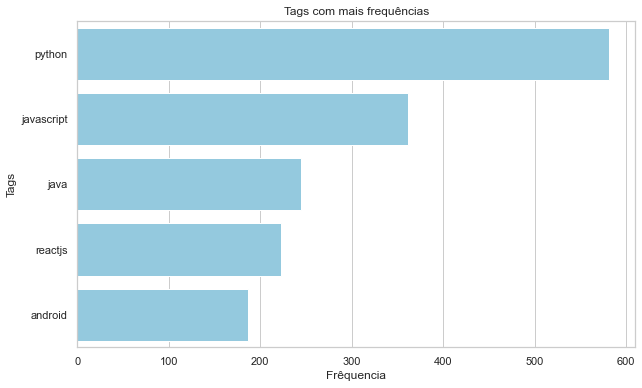

In [29]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y=df_1.head(5).index, data=df_1.head(5), color='skyblue')

# Adicionar rótulos aos eixos
plt.xlabel('Frêquencia')
plt.ylabel('Tags')

# Adicionar título ao gráfico
plt.title('Tags com mais frequências')

# Exibir o gráfico
plt.show()

### Tags com mais answers no dia de hoje

Neste trecho de código é possível analisar quais tags possuem mais respostas dos usuários. Observe por exemplo que se python aparece em duas linhas do dataframe, os itens correspondentes da coluna de answers, vão ser somados.

In [30]:
# Função para contar a frequência dos elementos e somar os inteiros correspondentes
def contar_elementos_e_respostas(lista, coluna):
    frequencia = {}
    soma_total = {}
    for sublist, valor in zip(lista, coluna):
        for item in sublist:
            if item in frequencia:
                frequencia[item] += 1
                soma_total[item] += int(valor)
            else:
                frequencia[item] = 1
                soma_total[item] = int(valor)
    resultado = {item: [frequencia[item], soma_total[item]] for item in frequencia}
    return resultado

# Converter as colunas em listas
lista1 = df_clean['tags'].tolist()
lista2 = df_clean['answers'].tolist()

# Contar a frequência dos elementos e somar os inteiros correspondentes
resultado = contar_elementos_e_respostas(lista1, lista2)

In [31]:
df_2 = pd.DataFrame.from_dict(resultado, orient='index', columns=['Frequência', 'Respostas']).sort_values(by='Respostas', ascending=False)
df_2

,Frequência,Respostas
python,581,838
javascript,361,685
android,187,375
php,137,356
java,244,351
...,...,...
serilog,4,0
react-native-twitter-signin,1,0
sage,1,0
reply,1,0


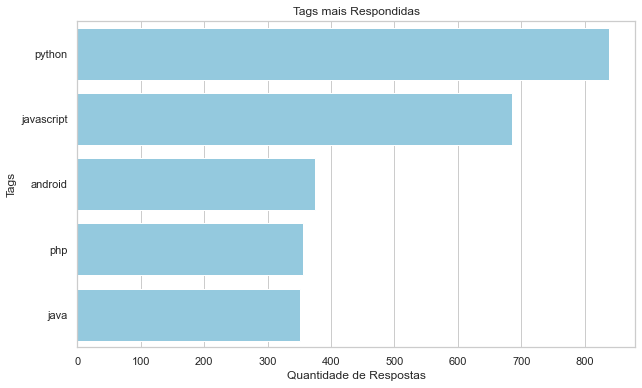

In [32]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Respostas', y=df_2.head(5).index, data=df_2.head(5), color='skyblue')

# Adicionar rótulos aos eixos
plt.xlabel('Quantidade de Respostas')
plt.ylabel('Tags')

# Adicionar título ao gráfico
plt.title('Tags mais Respondidas')

# Exibir o gráfico
plt.show()

A partir da tabela acima podemos fazer a seguinte pergunta: **Tags com muita frequência, consequentemente, tem mais respostas?** 


### Tags com mais visualizações no dia de hoje

In [33]:
# Converter as colunas em listas
lista1 = df_clean['tags'].tolist()
lista2 = df_clean['views'].tolist()

# Contar a frequência dos elementos e somar os inteiros correspondentes
resultado = contar_elementos_e_respostas(lista1, lista2)
df_3 = pd.DataFrame.from_dict(resultado, orient='index', columns=['Frequência', 'Views']).sort_values(by='Views', ascending=False)
df_3

,Frequência,Views
javascript,361,9100804
python,581,7190657
php,137,5441022
html,157,5374341
java,244,3020110
...,...,...
scilab,1,3
netrw,1,2
aws-security-group,1,2
amazon-sagemaker,1,2


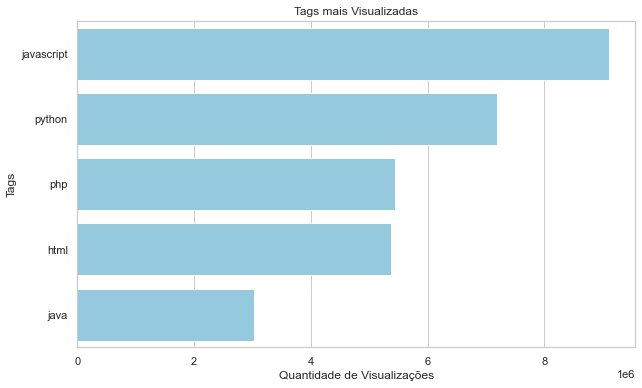

In [34]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Views', y=df_3.head(5).index, data=df_3.head(5), color='skyblue')

# Adicionar rótulos aos eixos
plt.xlabel('Quantidade de Visualizações')
plt.ylabel('Tags')

# Adicionar título ao gráfico
plt.title('Tags mais Visualizadas')

# Exibir o gráfico
plt.show()

### Tags com mais votos no dia de hoje

In [35]:
# Converter as colunas em listas
lista1 = df_clean['tags'].tolist()
lista2 = df_clean['votes'].tolist()

# Contar a frequência dos elementos e somar os inteiros correspondentes
resultado = contar_elementos_e_respostas(lista1, lista2)
df_4 = pd.DataFrame.from_dict(resultado, orient='index', columns=['Frequência', 'Votes']).sort_values(by='Votes', ascending=False)
df_4

,Frequência,Votes
javascript,361,9334
html,157,7370
optimization,6,4452
href,1,4394
performance,12,4394
...,...,...
api,33,-17
openai-api,17,-17
formatting,2,-21
raw-data,1,-21


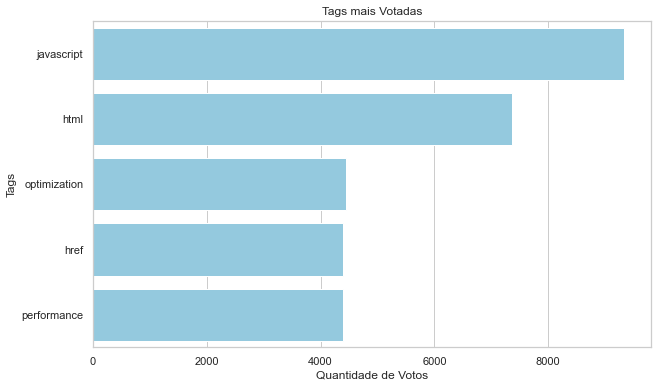

In [36]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Votes', y=df_4.head(5).index, data=df_4.head(5), color='skyblue')

# Adicionar rótulos aos eixos
plt.xlabel('Quantidade de Votos')
plt.ylabel('Tags')

# Adicionar título ao gráfico
plt.title('Tags mais Votadas')

# Exibir o gráfico
plt.show()

## 3. NLP

Ao extrair dados do Stack Overflow usando técnicas de Processamento de Linguagem Natural (NLP), você pode usar algoritmos e modelos de aprendizado de máquina para analisar os títulos das perguntas e determinar as maiores chances de pertencerem a um determinado tópico.

Usando técnicas de classificação de texto, você pode treinar um modelo para identificar padrões e características nos títulos das perguntas que estão associados a tópicos específicos. O modelo pode aprender com um conjunto de dados de treinamento, onde cada título de pergunta é rotulado com o tópico correspondente.

Ao avaliar um novo título de pergunta com seu modelo treinado, ele será capaz de atribuir probabilidades às diferentes classes de tópicos. Com base nessas probabilidades, você pode identificar o tópico com a maior chance de ser o correto para aquele título de pergunta.

Essa abordagem permite que você automatize a categorização de tópicos para as perguntas do Stack Overflow, facilitando a organização e a análise dos dados de acordo com os diferentes assuntos de interesse. Isso pode ser útil para diversas aplicações, como recomendação de conteúdo relevante, identificação de tendências ou até mesmo para melhorar a pesquisa e navegação no site.

In [38]:
# para trabalhar com diretórios / sistema operacional
import os

# para trabalhar com expressões regulares
import re

# utilizada para nos indicar o caminho do executável do Python
import sys

# para pandas DataFrame
import pandas as pd

# topic Modeling
import gensim
from gensim import corpora
from gensim import models

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from unicodedata import normalize
import string

C:\Users\ricar\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ricar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ricar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def preproc_texto(txt):
    # Remove caracteres numéricos
    txt = re.sub(r'\d+', '', txt)
    
    # Remove acentuação e pontuacao
    txt = normalize('NFKD', txt).encode('ASCII', 'ignore').decode('utf-8')
    txt = re.sub('['+string.punctuation+']', '', txt)
    
    # Transforma tudo para minúsculo
    txt = txt.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    palavras_desconsideradas = stop_words.union(['to', 'in', 'the', 'not', 'how', 'and', 'on', 'is', 'i', 'can'])
    tokens = word_tokenize(txt)
    tokens = [token for token in tokens if token not in palavras_desconsideradas]
    
    # Retorna a lista de palavras
    return tokens

# Resultado esperado ['hey', 'vamos', 'aprender', 'nlp', 'estudo', 'vezes', 'semana']
preproc_texto('Hey, vamos aprender NLP??? Eu estudo 3 vezes na semana.')

['hey', 'vamos', 'aprender', 'nlp', 'eu', 'estudo', 'vezes', 'na', 'semana']

In [53]:
df_clean['Titulo_preproc'] = df_clean['titulo'].apply(preproc_texto)

In [54]:
token_texto=df_clean['Titulo_preproc']
dic = corpora.Dictionary(token_texto)
corpus = [dic.doc2bow(token) for token in token_texto]

In [55]:
lda = models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dic, passes=5, iterations=100)

lista_topico = lda.print_topics(num_words=3)

for topico in lista_topico:
    print(topico)

(0, '0.011*"error" + 0.010*"using" + 0.010*"closed"')
(1, '0.015*"using" + 0.013*"python" + 0.010*"function"')


In [56]:
lda_top = lda.show_topics(formatted=False)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=('Tópico 1', 'Tópico 2'))

for i in range(2):
    topico = lda_top[i][1]
    topico.sort(key=lambda x: x[1], reverse=True)

    palavra = list(zip(*topico))[0]
    score = list(zip(*topico))[1]
    
    fig.add_trace(go.Bar(x=palavra, y=score,
                         marker=dict(color=score, coloraxis="coloraxis")), 1, i+1)
    
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

In [57]:
doc = ['how to use python',
       'i have error in data ']

token_frase = [word_tokenize(frase) for frase in doc]

corpus_ex = [dic.doc2bow(lista) for lista in token_frase]
lda_res = lda[corpus_ex]

for doc, as_text in zip(lda_res, doc):
    print(doc, as_text)

[(0, 0.5087749), (1, 0.49122515)] how to use python
[(0, 0.28659678), (1, 0.7134032)] i have error in data 
